In [161]:
#import libraries
import os
from pandas import read_csv
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

%matplotlib inline

import pandas_profiling


from scipy.stats import skew, norm
from scipy import stats
from scipy.special import boxcox1p
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, RobustScaler
from sklearn import linear_model
from sklearn.linear_model import ElasticNetCV, ElasticNet, LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, classification_report, accuracy_score
from math import sqrt



from lightgbm import LGBMRegressor
import lightgbm as lgb

In [162]:
#import data
current_path = os.getcwd()
current_path = os.path.dirname(current_path)
print(current_path)
#C:\Users\jonat\Desktop\capstone\nfl2\nfl_capstone\data_mart
dataset = current_path + '//data_mart//reporting_rb.csv'
cities = current_path + '//data_mart//facts_cities_metrics.csv'
college = current_path + '//data_mart//facts_college_metrics.csv'

dimc_file = current_path + '//data_mart//dimensions_cities.csv'
dimco_file = current_path + '//data_mart//dimensions_colleges.csv'
dimp_file = current_path + '//data_mart//dimensions_players.csv'




print(dataset)
city_dim = pd.read_csv(dimc_file)
college_dim = pd.read_csv(dimco_file)
player_dim = pd.read_csv(dimp_file)

dataset = pd.read_csv(dataset)
college_df = pd.read_csv(college)
city_df = pd.read_csv(cities)
dataset.head()

#https://stackoverflow.com/questions/9856683/using-pythons-os-path-how-do-i-go-up-one-directory

C:\Users\jonat\Desktop\capstone\nfl2\nfl_capstone
C:\Users\jonat\Desktop\capstone\nfl2\nfl_capstone//data_mart//reporting_rb.csv


,fms_id,espn_id,full_name,first_name,last_name,position,position_group,section,college,draft_year,...,rushing_rush_att_pg_zscore,rushing_rush_td_pg_zscore,rushing_rush_yds_pg_zscore,rushing_scrim_plays_pg_zscore,rushing_scrim_tds_pg_zscore,rushing_scrim_yds_pg_zscore,football_spending_zscore,coaches_salaries_zscore,ticket_sales_zscore,max_madden
0,113,3886636.0,Alex Barnes,Alex,Barnes,RB,RB,O,Kansas State,2019,...,-0.010877,0.089511,0.164368,-0.132464,-0.119293,-0.051690,-0.665105,-0.147962,-0.371611,63.0
1,136,4048244.0,Alexander Mattison,Alexander,Mattison,RB,RB,O,Boise State,2019,...,0.462081,0.561893,0.152931,0.492119,0.404870,0.186999,-0.752597,-0.758796,-0.983711,68.0
2,414,NaN,Benny Snell,Benny,Snell,RB,RB,O,Kentucky,2019,...,1.236402,1.672389,1.115162,1.056488,1.380955,0.783732,-0.502771,-0.134797,0.678511,69.0
3,645,3931398.0,Bryce Love,Bryce,Love,RB,RB,O,Stanford,2019,...,-0.327105,-0.223216,0.324403,-0.374233,-0.297134,0.203636,NaN,NaN,NaN,71.0
4,1182,3925347.0,Damien Harris,Damien,Harris,RB,RB,O,Alabama,2019,...,-0.923499,-0.794232,-0.528113,-0.947424,-0.849318,-0.640466,2.052018,2.142288,0.910284,69.0


In [163]:

dataset['football_spending']=dataset['coaches_salaries']=dataset['ticket_sales']=np.nan
dataset['poverty_pct']=dataset['med_income']=dataset['ann_rain_inch']=dataset['ann_snow_inch']=dataset['min_jan']=dataset['min_feb']=dataset['min_mar']=dataset['min_apr']=dataset['min_may']=dataset['min_jun']=dataset['min_jul']=dataset['min_aug']=dataset['min_sep']=dataset['min_oct']=dataset['min_nov']=dataset['min_dec']=dataset['max_jan']=dataset['max_feb']=dataset['max_mar']=dataset['max_apr']=dataset['max_may']=dataset['max_jun']=dataset['max_jul']=dataset['max_aug']=dataset['max_sep']=dataset['max_oct']=dataset['max_nov']=dataset['max_dec']=np.nan
for i in range(dataset.shape[0]):
  lookup_val = dataset['fms_id'][i]
  college_val = player_dim.loc[player_dim['fms_id'] == lookup_val]['fms_college_id'].values[0]
  dataset.at[i,'football_spending'] = college_df.loc[college_df['fms_college_id'] == college_val]['football_spending'].values[0]
  dataset.at[i,'coaches_salaries'] = college_df.loc[college_df['fms_college_id'] == college_val]['coaches_salaries'].values[0]
  dataset.at[i,'ticket_sales'] = college_df.loc[college_df['fms_college_id'] == college_val]['ticket_sales'].values[0]
  city_val = college_dim.loc[college_dim['fms_college_id'] == college_val]['fms_city_id'].values[0]
  dataset.at[i,'poverty_pct'] = city_df.loc[city_df['fms_city_id'] == city_val]['poverty_pct'].values[0]
  tmp = city_df.loc[city_df['fms_city_id'] == city_val]['med_income'].values[0]
  if type(tmp) == str:
    tmp = tmp.replace('$','').replace(',','')
  dataset.at[i,'med_income'] = tmp
  dataset.at[i,'ann_rain_inch'] = city_df.loc[city_df['fms_city_id'] == city_val]['ann_rain_inch'].values[0]
  dataset.at[i,'ann_snow_inch'] = city_df.loc[city_df['fms_city_id'] == city_val]['ann_snow_inch'].values[0]
  dataset.at[i,'min_jan'] = city_df.loc[city_df['fms_city_id'] == city_val]['min_jan'].values[0]
  dataset.at[i,'min_feb'] = city_df.loc[city_df['fms_city_id'] == city_val]['min_feb'].values[0]
  dataset.at[i,'min_mar'] = city_df.loc[city_df['fms_city_id'] == city_val]['min_mar'].values[0]
  dataset.at[i,'min_apr'] = city_df.loc[city_df['fms_city_id'] == city_val]['min_apr'].values[0]
  dataset.at[i,'min_may'] = city_df.loc[city_df['fms_city_id'] == city_val]['min_may'].values[0]
  dataset.at[i,'min_jun'] = city_df.loc[city_df['fms_city_id'] == city_val]['min_jun'].values[0]
  dataset.at[i,'min_jul'] = city_df.loc[city_df['fms_city_id'] == city_val]['min_jul'].values[0]
  dataset.at[i,'min_aug'] = city_df.loc[city_df['fms_city_id'] == city_val]['min_aug'].values[0]
  dataset.at[i,'min_sep'] = city_df.loc[city_df['fms_city_id'] == city_val]['min_sep'].values[0]
  dataset.at[i,'min_oct'] = city_df.loc[city_df['fms_city_id'] == city_val]['min_oct'].values[0]
  dataset.at[i,'min_nov'] = city_df.loc[city_df['fms_city_id'] == city_val]['min_nov'].values[0]
  dataset.at[i,'min_dec'] = city_df.loc[city_df['fms_city_id'] == city_val]['min_dec'].values[0]
  dataset.at[i,'max_jan'] = city_df.loc[city_df['fms_city_id'] == city_val]['max_jan'].values[0]
  dataset.at[i,'max_feb'] = city_df.loc[city_df['fms_city_id'] == city_val]['max_feb'].values[0]
  dataset.at[i,'max_mar'] = city_df.loc[city_df['fms_city_id'] == city_val]['max_mar'].values[0]
  dataset.at[i,'max_apr'] = city_df.loc[city_df['fms_city_id'] == city_val]['max_apr'].values[0]
  dataset.at[i,'max_may'] = city_df.loc[city_df['fms_city_id'] == city_val]['max_may'].values[0]
  dataset.at[i,'max_jun'] = city_df.loc[city_df['fms_city_id'] == city_val]['max_jun'].values[0]
  dataset.at[i,'max_jul'] = city_df.loc[city_df['fms_city_id'] == city_val]['max_jul'].values[0]
  dataset.at[i,'max_aug'] = city_df.loc[city_df['fms_city_id'] == city_val]['max_aug'].values[0]
  dataset.at[i,'max_sep'] = city_df.loc[city_df['fms_city_id'] == city_val]['max_sep'].values[0]
  dataset.at[i,'max_oct'] = city_df.loc[city_df['fms_city_id'] == city_val]['max_oct'].values[0]
  dataset.at[i,'max_nov'] = city_df.loc[city_df['fms_city_id'] == city_val]['max_nov'].values[0]
  dataset.at[i,'max_dec'] = city_df.loc[city_df['fms_city_id'] == city_val]['max_dec'].values[0]

In [164]:
for col in dataset.columns:
    print(col)

fms_id
espn_id
full_name
first_name
last_name
position
position_group
section
college
draft_year
selection_number
position_rank
position_group_rank
section_rank
drafting_team
home_city
home_state
home_country
college_weight_pounds
college_height_inches
hw_ratio
forty
vertical
bench
broad
threecone
shuttle
rushing_games
rushing_rec_td
rushing_rec_yards
rushing_receptions
rushing_rush_att
rushing_rush_td
rushing_rush_yds
rushing_scrim_plays
rushing_scrim_tds
rushing_scrim_yds
rushing_seasons
college_weight_pounds_zscore
college_height_inches_zscore
hw_ratio_zscore
forty_zscore
vertical_zscore
bench_zscore
broad_zscore
threecone_zscore
shuttle_zscore
rushing_games_zscore
rushing_rec_td_zscore
rushing_rec_yards_zscore
rushing_receptions_zscore
rushing_rush_att_zscore
rushing_rush_td_zscore
rushing_rush_yds_zscore
rushing_scrim_plays_zscore
rushing_scrim_tds_zscore
rushing_scrim_yds_zscore
rushing_seasons_zscore
max_madden_zscore
rushing_rec_td_pg_zscore
rushing_rec_yards_pg_zscore
rushing_

In [165]:
#determine which columns have None values
none_columns = []
for x in dataset.columns:
    if dataset[x].isnull().values.any() == True:
        none_columns.append(x)
print(none_columns)

['espn_id', 'selection_number', 'position_rank', 'position_group_rank', 'section_rank', 'drafting_team', 'home_city', 'home_state', 'home_country', 'forty', 'vertical', 'bench', 'broad', 'threecone', 'shuttle', 'forty_zscore', 'vertical_zscore', 'bench_zscore', 'broad_zscore', 'threecone_zscore', 'shuttle_zscore', 'max_madden_zscore', 'rushing_rec_td_pg_zscore', 'rushing_rec_yards_pg_zscore', 'rushing_receptions_pg_zscore', 'rushing_rush_att_pg_zscore', 'rushing_rush_td_pg_zscore', 'rushing_rush_yds_pg_zscore', 'rushing_scrim_plays_pg_zscore', 'rushing_scrim_tds_pg_zscore', 'rushing_scrim_yds_pg_zscore', 'football_spending_zscore', 'coaches_salaries_zscore', 'ticket_sales_zscore', 'max_madden', 'football_spending', 'coaches_salaries', 'ticket_sales', 'poverty_pct', 'med_income']


In [166]:
def z_score_rescale(data_mean, data_std, z_score):
    X = (z_score* data_std) + data_mean
    return X

In [167]:
dataset['max_madden'].describe()

count    320.000000
mean      75.746875
std        9.358834
min       57.000000
25%       68.000000
50%       74.000000
75%       82.250000
max       99.000000
Name: max_madden, dtype: float64

In [168]:
#Deal with None Values
none_dict = {'espn_id': 0,    
    'selection_number': 400,
    'position_rank': 400,
    'position_group_rank': 400,
    'section_rank': 400,
    'drafting_team': 'No Team',
    'home_city': 'No City',
    'home_state': 'No State',
    'home_country': 'USA',
    'forty': dataset['forty'].mean(),
    'vertical': dataset['vertical'].mean(), 
    'bench': dataset['bench'].mean(), 
    'broad': dataset['broad'].mean(),
    'threecone': dataset['threecone'].mean(),
    'shuttle': dataset['shuttle'].mean(),
    'football_spending': dataset['shuttle'].mean(), 
    'coaches_salaries': dataset['shuttle'].mean(), 
    'ticket_sales': dataset['shuttle'].mean(), 
    'poverty_pct': dataset['shuttle'].mean(), 
    'med_income': dataset['shuttle'].mean(),
    'max_madden': dataset['max_madden'].min() - 10,
    'forty_zscore': dataset['forty_zscore'].mean(), 
    'vertical_zscore': dataset['vertical_zscore'].mean(), 
    'bench_zscore': dataset['bench_zscore'].mean(), 
    'broad_zscore': dataset['broad_zscore'].mean(), 
    'threecone_zscore': dataset['threecone_zscore'].mean(), 
    'shuttle_zscore': dataset['shuttle_zscore'].mean(), 
    
    'max_madden_zscore': dataset['max_madden_zscore'].min() - 0.1,
    'rushing_rec_td_pg_zscore': dataset['rushing_rec_td_pg_zscore'].min(), 
    'rushing_rec_yards_pg_zscore': dataset['rushing_rec_yards_pg_zscore'].min(), 
    'rushing_receptions_pg_zscore': dataset['rushing_receptions_pg_zscore'].min(), 
    'rushing_rush_att_pg_zscore': dataset['rushing_rush_att_pg_zscore'].min(), 
    'rushing_rush_td_pg_zscore': dataset['rushing_rush_td_pg_zscore'].min(), 
    'rushing_rush_yds_pg_zscore': dataset['rushing_rush_yds_pg_zscore'].min(), 
    'rushing_scrim_plays_pg_zscore': dataset['rushing_scrim_plays_pg_zscore'].min(), 
    'rushing_scrim_tds_pg_zscore': dataset['rushing_scrim_tds_pg_zscore'].min(), 
    'rushing_scrim_yds_pg_zscore': dataset['rushing_scrim_yds_pg_zscore'].min(),
    'football_spending_zscore': dataset['football_spending_zscore'].min(), 
    'coaches_salaries_zscore':  dataset['coaches_salaries_zscore'].min(), 
    'ticket_sales_zscore':  dataset['ticket_sales_zscore'].min()}

print(none_dict)

for none_col in none_columns:
    dataset[none_col] = dataset[none_col].fillna(none_dict[none_col])
   

#https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html

{'espn_id': 0, 'selection_number': 400, 'position_rank': 400, 'position_group_rank': 400, 'section_rank': 400, 'drafting_team': 'No Team', 'home_city': 'No City', 'home_state': 'No State', 'home_country': 'USA', 'forty': 4.555525291828793, 'vertical': 34.36480186480186, 'bench': 19.435323383084576, 'broad': 118.0190023752969, 'threecone': 7.062059800664453, 'shuttle': 4.263355263157894, 'football_spending': 4.263355263157894, 'coaches_salaries': 4.263355263157894, 'ticket_sales': 4.263355263157894, 'poverty_pct': 4.263355263157894, 'med_income': 4.263355263157894, 'max_madden': 47.0, 'forty_zscore': 3.4006520038323862e-15, 'vertical_zscore': 9.585701825668018e-16, 'bench_zscore': 2.562902902617277e-16, 'broad_zscore': 9.620174807203257e-16, 'threecone_zscore': -3.794675906094223e-15, 'shuttle_zscore': 2.4308040960213954e-15, 'max_madden_zscore': -2.106258132775872, 'rushing_rec_td_pg_zscore': -0.9661947130048169, 'rushing_rec_yards_pg_zscore': -1.5350613749540352, 'rushing_receptions_p

In [169]:
dataset.head()

,fms_id,espn_id,full_name,first_name,last_name,position,position_group,section,college,draft_year,...,max_mar,max_apr,max_may,max_jun,max_jul,max_aug,max_sep,max_oct,max_nov,max_dec
0,113,3886636.0,Alex Barnes,Alex,Barnes,RB,RB,O,Kansas State,2019,...,57.0,67.3,76.7,86.1,91.5,90.2,81.8,69.7,55.4,42.5
1,136,4048244.0,Alexander Mattison,Alexander,Mattison,RB,RB,O,Boise State,2019,...,54.6,62.3,71.6,81.3,91.2,89.7,78.8,64.8,48.2,37.5
2,414,0.0,Benny Snell,Benny,Snell,RB,RB,O,Kentucky,2019,...,55.4,65.8,74.4,82.9,86.1,85.6,78.8,67.5,55.4,43.9
3,645,3931398.0,Bryce Love,Bryce,Love,RB,RB,O,Stanford,2019,...,65.7,69.7,74.3,78.4,79.6,79.4,79.5,74.0,64.8,58.3
4,1182,3925347.0,Damien Harris,Damien,Harris,RB,RB,O,Alabama,2019,...,69.7,77.2,84.1,90.2,92.7,92.6,87.7,77.7,67.7,58.2


In [170]:
#create categories for Madden Scores
def f(row):
    if row['max_madden'] >= 90 : val = 90
    elif row['max_madden'] < 90 and row['max_madden'] >= 80 : val = 80
    elif row['max_madden'] < 80 and row['max_madden'] >= 70 : val = 70  
    elif row['max_madden'] < 70 and row['max_madden'] >= 60 : val = 60
    elif row['max_madden'] < 60 and row['max_madden'] >= 50 : val = 50
    elif row['max_madden'] < 50 and row['max_madden'] >= 40 : val = 40
    else: val = 40
    return val
dataset['madden_cat'] = dataset.apply(f, axis=1)


def f_avg_min(row):
    avg_min = (row['min_jan'] + row['min_feb'] + row['min_mar'] + row['min_apr'] + row['min_may'] + row['min_jun'] + row['min_jul'] + row['min_aug'] + row['min_sep'] + row['min_oct'] + row['min_nov'] + row['min_dec'])/12
    return avg_min

def f_avg_max(row):
    avg_max = (row['max_jan'] + row['max_feb'] + row['max_mar'] + row['max_apr'] + row['max_may'] + row['max_jun'] + row['max_jul'] + row['max_aug'] + row['max_sep'] + row['max_oct'] + row['max_nov'] + row['max_dec'])/12
    return avg_max

dataset['avg_min'] = dataset.apply(f_avg_min, axis=1)


dataset['avg_max'] = dataset.apply(f_avg_max, axis=1)



In [171]:

#determine % of no madden scores wanted
no_madden_percentage = .20

no_madden_df = dataset.loc[dataset['madden_cat'] == 40]
madden_df = dataset.loc[dataset['madden_cat'] != 40]

print(no_madden_df.shape)
print(madden_df.shape)

current_no_madden_percentage = no_madden_df.shape[0] / dataset.shape[0] - no_madden_percentage
print(current_no_madden_percentage)
if current_no_madden_percentage > 0:
    remove_num = int(current_no_madden_percentage * dataset.shape[0])
    random_no_madden = np.random.choice(no_madden_df.index, remove_num)
    no_madden_df = no_madden_df.drop(random_no_madden)

print(no_madden_df.shape[0] / (no_madden_df.shape[0] + madden_df.shape[0]))
dataset = madden_df.append(no_madden_df)
dataset.head()
dataset = shuffle(dataset)
dataset.head()

#https://stackoverflow.com/questions/28556942/pandas-remove-rows-at-random-without-shuffling-dataset

(207, 106)
(320, 106)
0.1927893738140417
0.2825112107623318


,fms_id,espn_id,full_name,first_name,last_name,position,position_group,section,college,draft_year,...,max_jun,max_jul,max_aug,max_sep,max_oct,max_nov,max_dec,madden_cat,avg_min,avg_max
496,4773,0.0,Travis Minor,Travis,Minor,RB,RB,O,Florida State,2001,...,91.0,92.1,91.5,88.4,81.4,73.0,65.3,40,55.791667,79.533333
153,3128,0.0,Lache Seastrunk,Lache,Seastrunk,RB,RB,O,Baylor,2014,...,90.9,95.3,96.2,89.7,80.2,69.0,59.9,60,55.341667,77.783333
69,1756,0.0,Elijah McGuire,Elijah,McGuire,RB,RB,O,Louisiana,2017,...,87.9,90.7,89.6,84.7,75.6,66.4,57.1,70,48.183333,74.408333
458,1774,0.0,Ennis Haywood,Ennis,Haywood,RB,RB,O,Iowa State,2002,...,85.0,92.4,91.6,85.2,75.2,61.7,54.4,40,42.533333,71.733333
85,118,0.0,Alex Collins,Alex,Collins,RB,RB,O,Arkansas,2016,...,83.6,88.8,89.2,81.2,70.4,59.0,48.4,80,47.641667,68.491667


In [172]:
dataset.columns[30:]

Index(['rushing_receptions', 'rushing_rush_att', 'rushing_rush_td',
       'rushing_rush_yds', 'rushing_scrim_plays', 'rushing_scrim_tds',
       'rushing_scrim_yds', 'rushing_seasons', 'college_weight_pounds_zscore',
       'college_height_inches_zscore', 'hw_ratio_zscore', 'forty_zscore',
       'vertical_zscore', 'bench_zscore', 'broad_zscore', 'threecone_zscore',
       'shuttle_zscore', 'rushing_games_zscore', 'rushing_rec_td_zscore',
       'rushing_rec_yards_zscore', 'rushing_receptions_zscore',
       'rushing_rush_att_zscore', 'rushing_rush_td_zscore',
       'rushing_rush_yds_zscore', 'rushing_scrim_plays_zscore',
       'rushing_scrim_tds_zscore', 'rushing_scrim_yds_zscore',
       'rushing_seasons_zscore', 'max_madden_zscore',
       'rushing_rec_td_pg_zscore', 'rushing_rec_yards_pg_zscore',
       'rushing_receptions_pg_zscore', 'rushing_rush_att_pg_zscore',
       'rushing_rush_td_pg_zscore', 'rushing_rush_yds_pg_zscore',
       'rushing_scrim_plays_pg_zscore', 'rushing_s

In [173]:

#Total Features
"""['espn_id', 'full_name', 'first_name', 'last_name', 'position',
       'position_group', 'section', 'college', 'draft_year',
       'selection_number', 'position_rank', 'position_group_rank',
       'section_rank', 'drafting_team', 'home_city', 'home_state',
       'home_country', 'college_weight_pounds', 'college_height_inches',
       'hw_ratio', 'forty', 'vertical', 'bench', 'broad', 'threecone',
       'shuttle', 'rushing_games', 'rushing_rec_td', 'rushing_rec_yards',
       'rushing_receptions', 'rushing_rush_att', 'rushing_rush_td',
       'rushing_rush_yds', 'rushing_scrim_plays', 'rushing_scrim_tds',
       'rushing_scrim_yds', 'rushing_seasons', 'college_weight_pounds_zscore',
       'college_height_inches_zscore', 'hw_ratio_zscore', 'forty_zscore',
       'vertical_zscore', 'bench_zscore', 'broad_zscore', 'threecone_zscore',
       'shuttle_zscore', 'rushing_games_zscore', 'rushing_rec_td_zscore',
       'rushing_rec_yards_zscore', 'rushing_receptions_zscore',
       'rushing_rush_att_zscore', 'rushing_rush_td_zscore',
       'rushing_rush_yds_zscore', 'rushing_scrim_plays_zscore',
       'rushing_scrim_tds_zscore', 'rushing_scrim_yds_zscore',
       'rushing_seasons_zscore', 'max_madden_zscore',
       'rushing_rec_td_pg_zscore', 'rushing_rec_yards_pg_zscore',
       'rushing_receptions_pg_zscore', 'rushing_rush_att_pg_zscore',
       'rushing_rush_td_pg_zscore', 'rushing_rush_yds_pg_zscore',
       'rushing_scrim_plays_pg_zscore', 'rushing_scrim_tds_pg_zscore',
       'rushing_scrim_yds_pg_zscore', 'football_spending_zscore',
       'coaches_salaries_zscore', 'ticket_sales_zscore', 'max_madden',
       'football_spending', 'coaches_salaries', 'ticket_sales', 'poverty_pct',
       'med_income', 'ann_rain_inch', 'ann_snow_inch', 'min_jan', 'min_feb',
       'min_mar', 'min_apr', 'min_may', 'min_jun', 'min_jul', 'min_aug',
       'min_sep', 'min_oct', 'min_nov', 'min_dec', 'max_jan', 'max_feb',
       'max_mar', 'max_apr', 'max_may', 'max_jun', 'max_jul', 'max_aug',
       'max_sep', 'max_oct', 'max_nov', 'max_dec', 'avg_min',
       'avg_max', 'madden_cat']"""

# 'college_weight_pounds', 'college_height_inches'


features = ['college_weight_pounds', 'college_height_inches', 'forty', 'vertical', 'bench', 'broad', 'threecone',
       'shuttle', 'rushing_games', 'rushing_rec_td', 'rushing_rec_yards',
       'rushing_receptions', 'rushing_rush_att', 'rushing_rush_td',
       'rushing_rush_yds', 'rushing_scrim_plays', 'rushing_scrim_tds',
       'rushing_scrim_yds', 'rushing_seasons', 'football_spending', 'coaches_salaries', 'ticket_sales', 'poverty_pct',
       'med_income', 'ann_rain_inch', 'ann_snow_inch']

z_features = ['hw_ratio_zscore', 'forty_zscore', 'vertical_zscore', 'bench_zscore',
       'broad_zscore', 'threecone_zscore', 'shuttle_zscore',
       'rushing_games_zscore', 'rushing_rec_td_zscore',
       'rushing_rec_yards_zscore', 'rushing_receptions_zscore',
       'rushing_rush_att_zscore', 'rushing_rush_td_zscore',
       'rushing_rush_yds_zscore', 'rushing_scrim_plays_zscore',
       'rushing_scrim_tds_zscore', 'rushing_scrim_yds_zscore',
       'rushing_seasons_zscore','football_spending_zscore',
       'coaches_salaries_zscore', 'ticket_sales_zscore']

z_features_per_game = ['hw_ratio_zscore', 'forty_zscore', 'vertical_zscore', 'bench_zscore',
       'broad_zscore', 'threecone_zscore', 'shuttle_zscore',
       'rushing_rec_td_pg_zscore', 'rushing_rec_yards_pg_zscore',
       'rushing_receptions_pg_zscore', 'rushing_rush_att_pg_zscore',
       'rushing_rush_td_pg_zscore', 'rushing_rush_yds_pg_zscore',
       'rushing_scrim_plays_pg_zscore', 'rushing_scrim_tds_pg_zscore',
       'rushing_scrim_yds_pg_zscore', 'football_spending_zscore',
       'coaches_salaries_zscore', 'ticket_sales_zscore']





limit_features = ['rushing_rush_yds_zscore', 'rushing_scrim_yds_zscore', 'broad_zscore', 'rushing_receptions_zscore', 
'rushing_rush_att_zscore', 'rushing_scrim_plays_zscore', 'rushing_seasons_zscore', 'vertical_zscore']

In [174]:
def game_avg(row):
    stats_list = ['rushing_rec_td', 'rushing_rec_yards',
       'rushing_receptions', 'rushing_rush_att', 'rushing_rush_td', 'rushing_rush_yds', 'rushing_scrim_plays', 'rushing_scrim_tds',
       'rushing_scrim_yds']
    if row['rushing_games'] == 0:
        pass
    else:
        for stat in stats_list:
            row[stat] = row[stat]/row['rushing_games']
    return row


#use game averages?
game_averages = 'Y'
if game_averages == 'Y':
    dataset = dataset.apply(game_avg, axis=1)
else: pass

In [175]:
#select year to hold out
holdout_year = 2015
#pick features from above
features_list = features



#z_score features
#dataset['max_madden_zscore'] = stats.zscore(dataset['max_madden'].values)

for col in dataset[features_list].columns:
    dataset[col] = stats.zscore(dataset[col].values)


#prediction feature
#prediction_feature = 'max_madden'
#prediction_feature = 'max_madden_zscore'
prediction_feature = 'madden_cat'
features_list.append(prediction_feature)




#create a train and test df based on the hold out year
test_df = dataset.loc[dataset['draft_year'] == holdout_year]
train_df = dataset.loc[dataset['draft_year'] != holdout_year]

#shuffle the dataset
test_df = shuffle(test_df)
train_df = shuffle(train_df)

#create a copy of the dataset with that feature set
test_df_feat = test_df[features_list].copy()
train_df_feat = train_df[features_list].copy()

In [176]:
test_df_feat

,college_weight_pounds,college_height_inches,forty,vertical,bench,broad,threecone,shuttle,rushing_games,rushing_rec_td,...,rushing_scrim_yds,rushing_seasons,football_spending,coaches_salaries,ticket_sales,poverty_pct,med_income,ann_rain_inch,ann_snow_inch,madden_cat
115,-0.564139,-0.916637,-0.083226,-0.307196,-0.009844,0.549557,0.029497,0.010567,-0.523567,0.701972,...,1.523663,-0.496000,-0.529815,-0.682792,-0.958836,0.449923,-0.145277,0.742629,-0.656092,80
131,-0.636648,0.248093,-1.372130,0.006634,0.642949,-0.030173,0.029497,0.010567,-0.523567,-0.926566,...,0.881742,-0.496000,-1.218558,-1.281283,-1.051006,-0.043041,0.133744,0.442008,0.021356,80
125,1.176075,1.995186,0.561226,-1.032980,0.133885,-1.200720,0.029497,-0.536625,-1.031199,-0.446729,...,-0.932602,-0.496000,1.242970,1.071881,0.339681,1.118945,-0.189979,0.435017,-0.656092,70
128,0.160950,-0.916637,0.561226,-0.125750,-0.629713,-0.422819,-0.362424,-0.709363,-1.335778,0.148269,...,1.502872,-0.496000,0.346946,0.596506,0.126669,0.150623,-0.101015,0.304980,-0.635870,70
122,0.813531,0.830457,2.586647,-2.665995,-0.009844,-1.395195,0.711164,1.190752,0.999329,-0.646661,...,-1.625511,0.650197,-1.218558,-1.281283,-1.051006,0.573164,-0.105630,1.444544,-0.645981,60
123,0.668513,0.248093,0.653291,0.055696,-0.120648,-0.228344,-1.246556,-0.968470,0.593224,-0.010513,...,-0.437427,0.650197,0.889091,1.857936,2.449245,-0.254312,0.918941,-0.452165,-0.635870,70
121,1.103566,1.412822,-0.635614,-0.307196,-0.884245,-0.228344,0.648012,1.708965,1.303908,-0.663126,...,-1.612858,0.650197,0.567742,0.841202,0.276628,0.379499,-0.364081,1.185171,-0.656092,60
120,0.160950,-1.499001,1.389807,-0.851534,0.388417,-1.006245,0.029497,0.010567,-0.015935,-0.573002,...,-0.571293,-0.496000,-0.143094,0.150994,-0.380778,2.439385,-0.712857,1.014586,-0.656092,60
119,-0.491630,0.830457,-1.188001,0.055696,-0.009844,-0.033868,1.026925,0.499801,1.100856,-0.652373,...,-0.588144,0.650197,0.862488,0.584625,0.884690,0.819646,-0.110378,-0.385749,1.431863,70
111,-0.201594,-0.334272,-0.175291,0.781480,-0.009844,-0.033868,0.458555,0.010567,-1.234251,-0.926566,...,0.281008,-1.642196,1.838003,1.893543,0.603975,-0.940940,0.460763,0.799957,-0.620703,70


In [177]:
X_train, Y_train = train_df_feat[:].drop([prediction_feature], axis =1), train_df_feat.pop(prediction_feature)
X_validation, Y_validation = test_df_feat[:].drop([prediction_feature], axis =1), test_df_feat.pop(prediction_feature)

#quick check that the original dataset and copied dataset have the same score
print(Y_train[113])
dataset[prediction_feature][113]

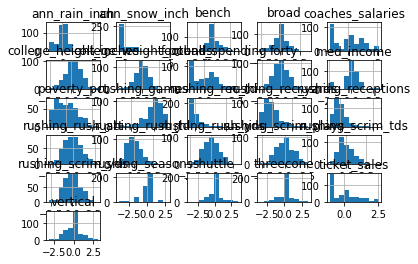

In [178]:
# histograms for some interesting measurements
X_train.hist()
pyplot.show()

In [179]:
result_df = test_df[['full_name', prediction_feature, 'position_group_rank']].copy()
print(result_df)
def result_df_viz(df, predictions, model_name):
    
    df[model_name] = predictions
    #return result_df.sort_values(by=['max_madden_pred'], ascending=False)
    return df

               full_name  madden_cat  position_group_rank
115         Duke Johnson          80                  6.0
131        Tevin Coleman          80                  5.0
125           Matt Jones          70                  7.0
128           Mike Davis          70                 11.0
122       Kenny Hilliard          60                 20.0
123        Malcolm Brown          70                 27.0
121      Karlos Williams          60                 14.0
120        Josh Robinson          60                 17.0
119      Jeremy Langford          70                  8.0
111  Cameron Artis-Payne          70                 16.0
109         B.J. Catalon          40                 22.0
134        Trey Williams          60                 31.0
112           David Cobb          70                 12.0
132         Thomas Rawls          80                 30.0
116       Jahwan Edwards          60                 26.0
108       Ameer Abdullah          80                  4.0
127         Mi

In [180]:
   # Plot feature importance
def plot_feat_import(coef, model_title):
    feature_coef = pd.Series(index=X_train.columns, data=coef)
    print('{} model picked {} out of {} features'.format(model_title, str(sum(feature_coef != 0)), str(X_train.shape[1])))
    top_bottom_10 = pd.concat([feature_coef.sort_values().head(10), feature_coef.sort_values().tail(10)])
    top_bottom_10.plot(kind='barh', title='Feature importance (Top and bottom 10) - {} model'.format(model_title))
    #from W207 project (Fleishman, Hilton, Niu)
    
# Plot predictions
def plot_it(y_train, y_valid, model_title):
    plt.scatter(y_train, train_labels, c = "blue", alpha=0.6, marker = "o", label = "Training data")
    plt.scatter(y_valid, dev_labels, c = "green", alpha=0.6, marker = "o", label = "Validation data")
    plt.title(model_title)
    plt.xlabel("Predicted values")
    plt.ylabel("Real values")
    plt.legend(loc = "upper left")
    plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
    plt.show()
    
def print_results(true_val, predict_val):
    print('Accuracy:  ' + str(accuracy_score(true_val, predict_val)))
    print('R2 : ' + str(r2_score(true_val, predict_val)))
    print('MSE : ' + str(mean_squared_error(true_val, predict_val)))
    

def plot_confusion(mat, model):
    
    array = mat
    df_cm = pd.DataFrame(array, index = [i for i in class_names],
                      columns = [i for i in class_names])
    plt.figure(figsize = (10,7))
    plt.title(model)
    sn.heatmap(df_cm, annot=True, cmap="Blues")


#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
    
    
class_names = [40, 50, 60, 70, 80, 90]

Accuracy:  0.48
R2 : 0.025974025974026205
MSE : 96.0
AdaBoostRegressor model picked 26 out of 26 features


,full_name,madden_cat,position_group_rank,AdaBoost
115,Duke Johnson,80,6.0,80.0
131,Tevin Coleman,80,5.0,70.0
125,Matt Jones,70,7.0,40.0
128,Mike Davis,70,11.0,70.0
122,Kenny Hilliard,60,20.0,60.0
123,Malcolm Brown,70,27.0,60.0
121,Karlos Williams,60,14.0,60.0
120,Josh Robinson,60,17.0,50.0
119,Jeremy Langford,70,8.0,60.0
111,Cameron Artis-Payne,70,16.0,60.0


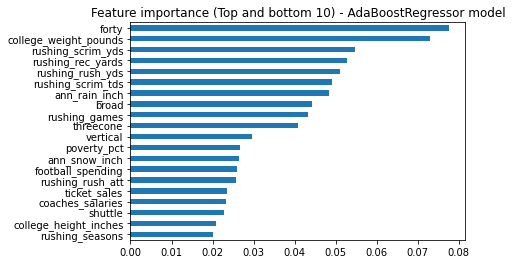

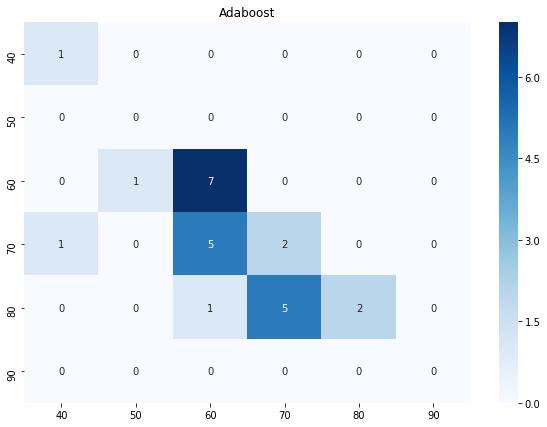

In [181]:
#Adaboost
adaboostregressor = AdaBoostRegressor(DecisionTreeRegressor(criterion='mse'), n_estimators=100, loss='linear', learning_rate=1, random_state=1)
adaboostregressor.fit(X_train, Y_train)
madden_predict = adaboostregressor.predict(X_validation)
print_results(Y_validation, madden_predict)
plot_feat_import(adaboostregressor.feature_importances_, 'AdaBoostRegressor')
mat = confusion_matrix(Y_validation, madden_predict, labels = class_names)
plot_confusion(mat, 'Adaboost')
result_df_viz(result_df, madden_predict, 'AdaBoost')
#plot_confusion_matrix(adaboostregressor, X_validation, Y_validation)


In [185]:
model = adaboostregressor
kfold = StratifiedKFold(n_splits=30, random_state=1, shuffle=True)
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
print(cv_results)

C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=30.
  % (min_groups, self.n_splits)), UserWarning)


[0.4        0.14285714 0.42857143 0.28571429 0.21428571 0.35714286
 0.21428571 0.5        0.14285714 0.35714286 0.35714286 0.42857143
 0.21428571 0.35714286 0.21428571 0.57142857 0.21428571 0.21428571
 0.21428571 0.42857143 0.42857143 0.28571429 0.07142857 0.21428571
 0.35714286 0.14285714 0.35714286 0.5        0.35714286 0.07142857]


Accuracy:  0.2222222222222222
R2 : -3.0
MSE : 592.5925925925926


C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,full_name,madden_cat,position_group_rank,Log_Regression,AdaBoost
127,Michael Dyer,60,28.0,60,40.0
128,Mike Davis,70,11.0,40,70.0
131,Tevin Coleman,80,5.0,70,80.0
119,Jeremy Langford,70,8.0,40,40.0
108,Ameer Abdullah,80,4.0,70,70.0
123,Malcolm Brown,70,27.0,40,70.0
129,T.J. Yeldon,80,3.0,40,70.0
117,Javorius Allen,70,10.0,40,70.0
122,Kenny Hilliard,60,20.0,60,60.0
125,Matt Jones,70,7.0,40,50.0


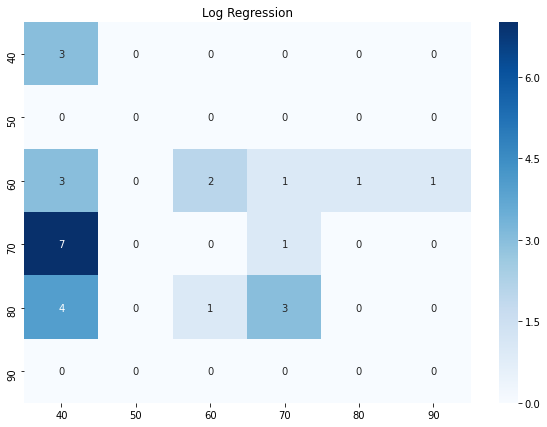

In [131]:
#Logistic Regression:
clf = LogisticRegression(random_state=1).fit(X_train, Y_train)
madden_predict = clf.predict(X_validation)
print_results(Y_validation, madden_predict)
mat = confusion_matrix(Y_validation, madden_predict, labels = class_names)
plot_confusion(mat, 'Log Regression')
result_df_viz(result_df, madden_predict, 'Log_Regression')


Accuracy:  0.0
R2 : -0.3027500000000001
MSE : 193.0
Lasso model picked 20 out of 28 features
----------


,full_name,madden_cat,position_group_rank,Log_Regression,AdaBoost,Lasso
127,Michael Dyer,60,28.0,60,40.0,63.0
128,Mike Davis,70,11.0,40,70.0,57.0
131,Tevin Coleman,80,5.0,70,80.0,67.0
119,Jeremy Langford,70,8.0,40,40.0,59.0
108,Ameer Abdullah,80,4.0,70,70.0,63.0
123,Malcolm Brown,70,27.0,40,70.0,59.0
129,T.J. Yeldon,80,3.0,40,70.0,60.0
117,Javorius Allen,70,10.0,40,70.0,61.0
122,Kenny Hilliard,60,20.0,60,60.0,57.0
125,Matt Jones,70,7.0,40,50.0,54.0


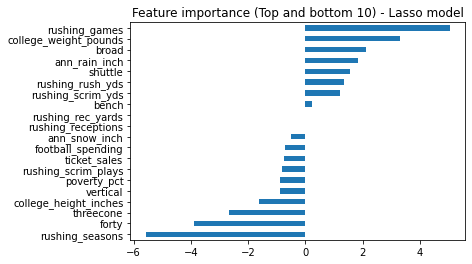

In [132]:
#Lasso:
alpha = 0.1
lasso_model = Lasso(alpha=alpha).fit(X_train, Y_train)
madden_predict = lasso_model.predict(X_validation)

madden_predict = np.around(madden_predict, decimals = 0)
print_results(Y_validation, madden_predict)
plot_feat_import(lasso_model.coef_, 'Lasso')  
#plot_it()
print('----------')
result_df_viz(result_df, madden_predict, 'Lasso')

Accuracy:  0.037037037037037035
R2 : -0.22825000000000006
MSE : 181.96296296296296
LassoCV Model
Lassocv model picked 17 out of 28 features
----------


,full_name,madden_cat,position_group_rank,Log_Regression,AdaBoost,Lasso,LassoCV
127,Michael Dyer,60,28.0,60,40.0,63.0,62.0
128,Mike Davis,70,11.0,40,70.0,57.0,58.0
131,Tevin Coleman,80,5.0,70,80.0,67.0,67.0
119,Jeremy Langford,70,8.0,40,40.0,59.0,60.0
108,Ameer Abdullah,80,4.0,70,70.0,63.0,62.0
123,Malcolm Brown,70,27.0,40,70.0,59.0,59.0
129,T.J. Yeldon,80,3.0,40,70.0,60.0,60.0
117,Javorius Allen,70,10.0,40,70.0,61.0,62.0
122,Kenny Hilliard,60,20.0,60,60.0,57.0,56.0
125,Matt Jones,70,7.0,40,50.0,54.0,56.0


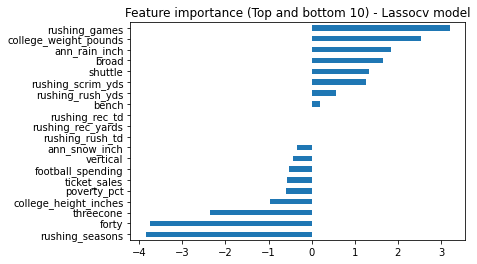

In [133]:
#Lassocv:

lasso_modelcv = LassoCV(cv=5, random_state=0).fit(X_train, Y_train)
madden_predict = lasso_modelcv.predict(X_validation)
madden_predict = np.around(madden_predict, decimals = 0)
print_results(Y_validation, madden_predict)
print('LassoCV Model')
plot_feat_import(lasso_modelcv.coef_, 'Lassocv') 
print('----------')
result_df_viz(result_df, madden_predict, 'LassoCV')


Accuracy:  0.0
R2 : -0.3254999999999999
MSE : 196.37037037037038
RidgeCV model picked 28 out of 28 features
----------


,full_name,madden_cat,position_group_rank,Log_Regression,AdaBoost,Lasso,LassoCV,RidgeCV
127,Michael Dyer,60,28.0,60,40.0,63.0,62.0,64.0
128,Mike Davis,70,11.0,40,70.0,57.0,58.0,57.0
131,Tevin Coleman,80,5.0,70,80.0,67.0,67.0,67.0
119,Jeremy Langford,70,8.0,40,40.0,59.0,60.0,59.0
108,Ameer Abdullah,80,4.0,70,70.0,63.0,62.0,62.0
123,Malcolm Brown,70,27.0,40,70.0,59.0,59.0,58.0
129,T.J. Yeldon,80,3.0,40,70.0,60.0,60.0,59.0
117,Javorius Allen,70,10.0,40,70.0,61.0,62.0,61.0
122,Kenny Hilliard,60,20.0,60,60.0,57.0,56.0,58.0
125,Matt Jones,70,7.0,40,50.0,54.0,56.0,54.0


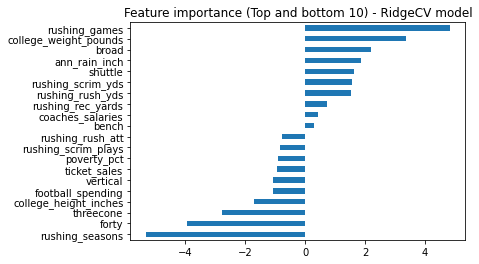

In [134]:
#RidgeCV:

ridge_model = RidgeCV(cv=5).fit(X_train, Y_train)
madden_predict = ridge_model.predict(X_validation)
madden_predict = np.around(madden_predict, decimals = 0)
print_results(Y_validation, madden_predict)

plot_feat_import(ridge_model.coef_, 'RidgeCV')
print('----------')
result_df_viz(result_df, madden_predict, 'RidgeCV')

Accuracy:  0.037037037037037035
R2 : -0.18975000000000009
MSE : 176.25925925925927
ElasticNetCV model picked 19 out of 28 features


,full_name,madden_cat,position_group_rank,Log_Regression,AdaBoost,Lasso,LassoCV,RidgeCV,ElasticNetCV
127,Michael Dyer,60,28.0,60,40.0,63.0,62.0,64.0,63.0
128,Mike Davis,70,11.0,40,70.0,57.0,58.0,57.0,59.0
131,Tevin Coleman,80,5.0,70,80.0,67.0,67.0,67.0,67.0
119,Jeremy Langford,70,8.0,40,40.0,59.0,60.0,59.0,60.0
108,Ameer Abdullah,80,4.0,70,70.0,63.0,62.0,62.0,61.0
123,Malcolm Brown,70,27.0,40,70.0,59.0,59.0,58.0,59.0
129,T.J. Yeldon,80,3.0,40,70.0,60.0,60.0,59.0,60.0
117,Javorius Allen,70,10.0,40,70.0,61.0,62.0,61.0,62.0
122,Kenny Hilliard,60,20.0,60,60.0,57.0,56.0,58.0,56.0
125,Matt Jones,70,7.0,40,50.0,54.0,56.0,54.0,57.0


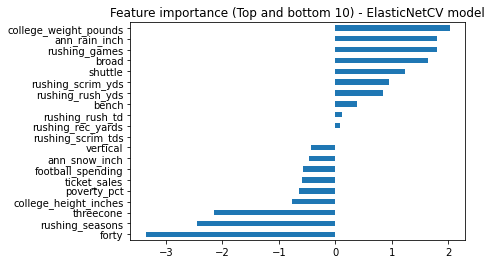

In [135]:
#ElasticNetCV:

elasticnetcv_model = ElasticNetCV(cv=5, random_state=0).fit(X_train, Y_train)
madden_predict = elasticnetcv_model.predict(X_validation)
madden_predict = np.around(madden_predict, decimals = 0)
print_results(Y_validation, madden_predict)
plot_feat_import(elasticnetcv_model.coef_, 'ElasticNetCV')
result_df_viz(result_df, madden_predict, 'ElasticNetCV')

Accuracy:  0.25925925925925924
R2 : -1.3250000000000002
MSE : 344.44444444444446
Decision Tree Regressor model picked 28 out of 28 features


,full_name,madden_cat,position_group_rank,Log_Regression,AdaBoost,Lasso,LassoCV,RidgeCV,ElasticNetCV,Decision_Tree_Reg
127,Michael Dyer,60,28.0,60,40.0,63.0,62.0,64.0,63.0,40.0
128,Mike Davis,70,11.0,40,70.0,57.0,58.0,57.0,59.0,60.0
131,Tevin Coleman,80,5.0,70,80.0,67.0,67.0,67.0,67.0,70.0
119,Jeremy Langford,70,8.0,40,40.0,59.0,60.0,59.0,60.0,40.0
108,Ameer Abdullah,80,4.0,70,70.0,63.0,62.0,62.0,61.0,60.0
123,Malcolm Brown,70,27.0,40,70.0,59.0,59.0,58.0,59.0,40.0
129,T.J. Yeldon,80,3.0,40,70.0,60.0,60.0,59.0,60.0,70.0
117,Javorius Allen,70,10.0,40,70.0,61.0,62.0,61.0,62.0,70.0
122,Kenny Hilliard,60,20.0,60,60.0,57.0,56.0,58.0,56.0,70.0
125,Matt Jones,70,7.0,40,50.0,54.0,56.0,54.0,57.0,40.0


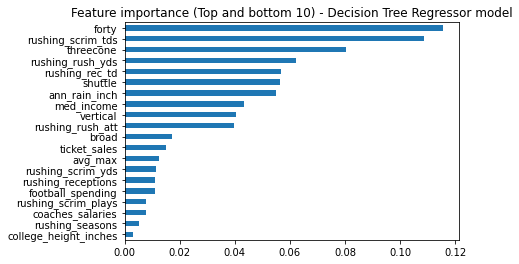

In [137]:
#Decision Tree Regressor
decisiontreeregrssor = DecisionTreeRegressor()
decisiontreeregrssor.fit(X_train, Y_train)
madden_predict = decisiontreeregrssor.predict(X_validation)
print_results(Y_validation, madden_predict)
plot_feat_import(decisiontreeregrssor.feature_importances_, 'Decision Tree Regressor')
result_df_viz(result_df, madden_predict, 'Decision_Tree_Reg')

Accuracy:  0.37037037037037035
R2 : -0.5000000000000002
MSE : 222.22222222222223
Decision Tree Classifier model picked 44 out of 50 features
[[2 1 0 0 0]
 [2 2 3 1 0]
 [2 1 4 1 0]
 [1 0 4 2 1]
 [0 0 0 0 0]]


,full_name,madden_cat,position_group_rank,Log_Regression,AdaBoost,Decision_Tree_Class
109,B.J. Catalon,40,22.0,40,60.0,40
108,Ameer Abdullah,80,4.0,70,70.0,70
116,Jahwan Edwards,60,26.0,40,70.0,70
131,Tevin Coleman,80,5.0,60,70.0,90
134,Trey Williams,60,31.0,80,60.0,60
111,Cameron Artis-Payne,70,16.0,70,70.0,80
126,Melvin Gordon,80,2.0,40,60.0,70
115,Duke Johnson,80,6.0,60,70.0,80
110,Braylon Heard,40,23.0,40,60.0,40
121,Karlos Williams,60,14.0,90,70.0,40


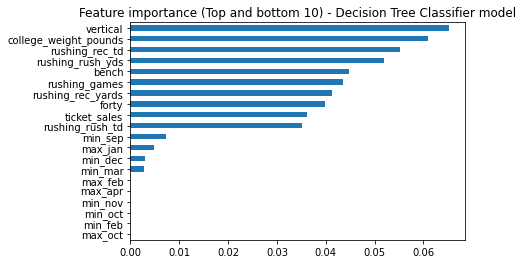

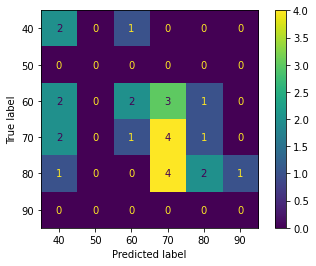

In [118]:
#Decision Tree
from sklearn import tree
decisiontree = DecisionTreeClassifier(max_depth = 100)
decisiontree.fit(X_train, Y_train)
madden_predict = decisiontree.predict(X_validation)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
plot_feat_import(decisiontree.feature_importances_, 'Decision Tree Classifier')
print(confusion_matrix(Y_validation, madden_predict))
plot_confusion_matrix(decisiontree, X_validation, Y_validation, labels = class_names)
result_df_viz(result_df, madden_predict, 'Decision_Tree_Class')

Accuracy:  0.34615384615384615
R2 : -2.066037735849057
MSE : 384.61538461538464
Extra Tree Classifier model picked 50 out of 50 features
[[1 1 0 0]
 [6 2 0 0]
 [4 1 3 0]
 [2 0 3 3]]


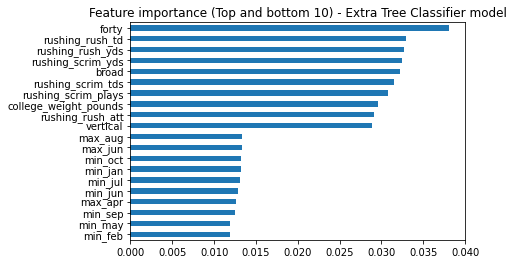

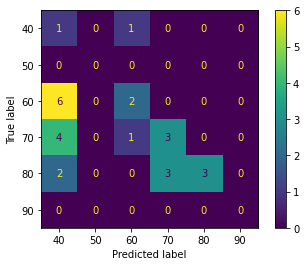

In [51]:
#Extra Tree


from sklearn import tree
extradecisiontree = ExtraTreesClassifier(max_depth = 300)
extradecisiontree.fit(X_train, Y_train)
madden_predict = extradecisiontree.predict(X_validation)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
plot_feat_import(extradecisiontree.feature_importances_, 'Extra Tree Classifier')
result_df_viz(result_df, madden_predict, 'Extra_Tree')
print(confusion_matrix(Y_validation, madden_predict))
plot_confusion_matrix(extradecisiontree, X_validation, Y_validation, labels=class_names)

Accuracy:  0.34615384615384615
R2 : -1.2995283018867925
MSE : 288.46153846153845
AdaBoostClassifier model picked 44 out of 50 features


,full_name,madden_cat,position_group_rank,Log_Regression,Lasso,LassoCV,RidgeCV,ElasticNetCV,Decision_Tree_Reg,AdaBoost,Decision_Tree_Class,Extra_Tree,AdaBoost_Class
133,Todd Gurley,80,1.0,80,73.0,73.0,73.0,73.0,80.0,80.0,80,80,80
108,Ameer Abdullah,80,4.0,70,62.0,61.0,61.0,61.0,70.0,70.0,60,70,80
130,Terrence Magee,60,29.0,60,49.0,49.0,49.0,50.0,40.0,60.0,40,40,40
119,Jeremy Langford,70,8.0,40,56.0,56.0,55.0,56.0,40.0,60.0,60,40,60
134,Trey Williams,60,31.0,60,61.0,60.0,61.0,60.0,80.0,60.0,70,60,70
112,David Cobb,70,12.0,40,48.0,49.0,48.0,50.0,60.0,60.0,90,40,90
127,Michael Dyer,60,28.0,60,62.0,62.0,62.0,62.0,40.0,60.0,40,40,40
117,Javorius Allen,70,10.0,70,68.0,68.0,69.0,68.0,90.0,70.0,70,70,70
128,Mike Davis,70,11.0,80,68.0,68.0,69.0,68.0,70.0,70.0,70,70,70
121,Karlos Williams,60,14.0,60,65.0,64.0,66.0,63.0,70.0,60.0,60,40,60


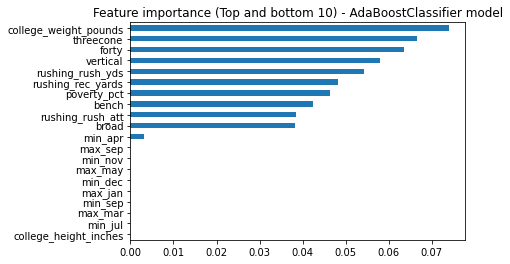

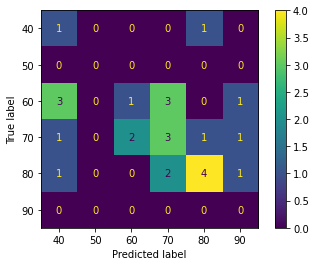

In [52]:
#Adaboost
adaboostclassifier = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=500)
adaboostclassifier.fit(X_train, Y_train)
madden_predict = adaboostclassifier.predict(X_validation)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
plot_feat_import(adaboostclassifier.feature_importances_, 'AdaBoostClassifier')

plot_confusion_matrix(adaboostclassifier, X_validation, Y_validation, labels = class_names)
result_df_viz(result_df, madden_predict, 'AdaBoost_Class')


Accuracy:  0.34615384615384615
R2 : -1.7900943396226414
MSE : 350.0


,full_name,madden_cat,position_group_rank,Log_Regression,Lasso,LassoCV,RidgeCV,ElasticNetCV,Decision_Tree_Reg,AdaBoost,Decision_Tree_Class,Extra_Tree,AdaBoost_Class,SVM
fms_id,,,,,,,,,,,,,,
2337,Jay Ajayi,80,13.0,70,71.0,71.0,70.0,70.0,70.0,70.0,70,70,70,70
3291,Malcolm Brown,70,27.0,40,56.0,56.0,56.0,56.0,40.0,70.0,60,40,60,70
170,Ameer Abdullah,80,4.0,70,67.0,67.0,67.0,67.0,40.0,70.0,70,70,80,70
2727,Josh Robinson,60,17.0,60,66.0,64.0,66.0,66.0,50.0,60.0,80,60,90,60
4824,Trey Williams,60,31.0,60,58.0,57.0,58.0,58.0,40.0,70.0,70,40,70,60
1685,Duke Johnson,80,6.0,80,72.0,71.0,72.0,72.0,80.0,80.0,40,80,40,70
355,B.J. Catalon,40,22.0,40,51.0,52.0,52.0,52.0,40.0,60.0,50,40,80,40
4539,T.J. Yeldon,80,3.0,70,69.0,69.0,69.0,69.0,80.0,60.0,40,70,40,70
1327,David Cobb,70,12.0,40,60.0,61.0,61.0,61.0,70.0,60.0,60,70,60,40


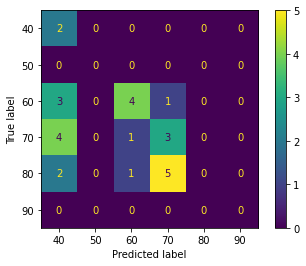

In [30]:
#SVM
svmclassifier = SVC(gamma='auto')
svmclassifier.fit(X_train, Y_train)
madden_predict = svmclassifier.predict(X_validation)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
#plot_feat_import(svmclassifier.feature_importances_, 'SVC')
plot_confusion_matrix(svmclassifier, X_validation, Y_validation, labels = class_names)
result_df_viz(result_df, madden_predict, 'SVM')

Accuracy:  0.34615384615384615
R2 : -1.3301886792452828
MSE : 292.3076923076923
Random Forest model picked 19 out of 19 features


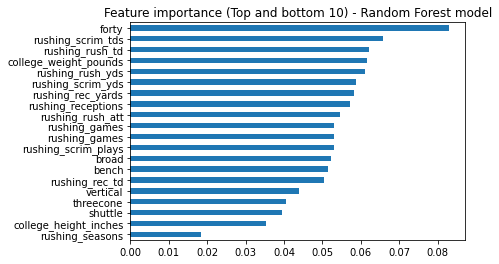

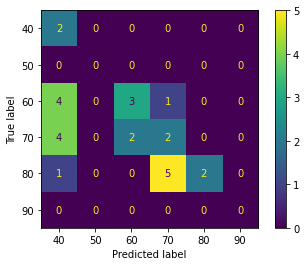

In [31]:
#RandomForest
rfclassifier = RandomForestClassifier()
rfclassifier.fit(X_train, Y_train)
madden_predict = rfclassifier.predict(X_validation)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
plot_feat_import(rfclassifier.feature_importances_, 'Random Forest')
result_df_viz(result_df, madden_predict, 'RF_Class')
plot_confusion_matrix(rfclassifier, X_validation, Y_validation, labels = class_names)

In [32]:
#PCA with Linear Regression
pca = PCA(n_components=5)
pca_x = pca.fit_transform(X_train)
pca_validation = pca.transform(X_validation)

log_pca = LogisticRegression(random_state=0).fit(pca_x, Y_train)
madden_predict = log_pca.predict(pca_validation)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
#print(log_pca.coef_.shape)
#plot_feat_import(log_pca.coef_, 'PCA with Log Regression')
result_df_viz(result_df, madden_predict, 'Log_PCA')

Accuracy:  0.3076923076923077
R2 : -1.9740566037735845
MSE : 373.0769230769231


,full_name,madden_cat,position_group_rank,Log_Regression,Lasso,LassoCV,RidgeCV,ElasticNetCV,Decision_Tree_Reg,AdaBoost,Decision_Tree_Class,Extra_Tree,AdaBoost_Class,SVM,RF_Class,Log_PCA
fms_id,,,,,,,,,,,,,,,,
2337,Jay Ajayi,80,13.0,70,71.0,71.0,70.0,70.0,70.0,70.0,70,70,70,70,70,70
3291,Malcolm Brown,70,27.0,40,56.0,56.0,56.0,56.0,40.0,70.0,60,40,60,70,40,40
170,Ameer Abdullah,80,4.0,70,67.0,67.0,67.0,67.0,40.0,70.0,70,70,80,70,70,70
2727,Josh Robinson,60,17.0,60,66.0,64.0,66.0,66.0,50.0,60.0,80,60,90,60,60,40
4824,Trey Williams,60,31.0,60,58.0,57.0,58.0,58.0,40.0,70.0,70,40,70,60,70,60
1685,Duke Johnson,80,6.0,80,72.0,71.0,72.0,72.0,80.0,80.0,40,80,40,70,70,70
355,B.J. Catalon,40,22.0,40,51.0,52.0,52.0,52.0,40.0,60.0,50,40,80,40,40,40
4539,T.J. Yeldon,80,3.0,70,69.0,69.0,69.0,69.0,80.0,60.0,40,70,40,70,70,70
1327,David Cobb,70,12.0,40,60.0,61.0,61.0,61.0,70.0,60.0,60,70,60,40,40,40


Accuracy:  0.0
R2 : -0.18349056603773573
MSE : 148.46153846153845
Gradient Booster Regressor model picked 19 out of 19 features


,full_name,madden_cat,position_group_rank,Log_Regression,Lasso,LassoCV,RidgeCV,ElasticNetCV,Decision_Tree_Reg,AdaBoost,Decision_Tree_Class,Extra_Tree,AdaBoost_Class,SVM,RF_Class,Log_PCA,GB_Regressor
fms_id,,,,,,,,,,,,,,,,,
2337,Jay Ajayi,80,13.0,70,71.0,71.0,70.0,70.0,70.0,70.0,70,70,70,70,70,70,72.0
3291,Malcolm Brown,70,27.0,40,56.0,56.0,56.0,56.0,40.0,70.0,60,40,60,70,40,40,58.0
170,Ameer Abdullah,80,4.0,70,67.0,67.0,67.0,67.0,40.0,70.0,70,70,80,70,70,70,63.0
2727,Josh Robinson,60,17.0,60,66.0,64.0,66.0,66.0,50.0,60.0,80,60,90,60,60,40,56.0
4824,Trey Williams,60,31.0,60,58.0,57.0,58.0,58.0,40.0,70.0,70,40,70,60,70,60,59.0
1685,Duke Johnson,80,6.0,80,72.0,71.0,72.0,72.0,80.0,80.0,40,80,40,70,70,70,79.0
355,B.J. Catalon,40,22.0,40,51.0,52.0,52.0,52.0,40.0,60.0,50,40,80,40,40,40,48.0
4539,T.J. Yeldon,80,3.0,70,69.0,69.0,69.0,69.0,80.0,60.0,40,70,40,70,70,70,56.0
1327,David Cobb,70,12.0,40,60.0,61.0,61.0,61.0,70.0,60.0,60,70,60,40,40,40,54.0


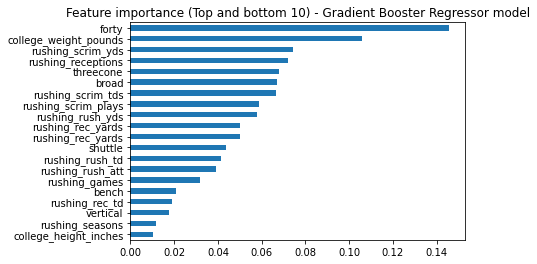

In [33]:
#Gradient Booster Regressor
import numpy as np
gradientboostingregressor = GradientBoostingRegressor(random_state=0)
gradientboostingregressor.fit(X_train, Y_train)
madden_predict = gradientboostingregressor.predict(X_validation)
madden_predict = np.around(madden_predict, decimals = 0)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
plot_feat_import(gradientboostingregressor.feature_importances_, 'Gradient Booster Regressor')
result_df_viz(result_df, madden_predict, 'GB_Regressor')

In [34]:
from scipy.stats import rankdata
print(result_df.columns[3:])
rank_df = result_df[result_df.columns[3:]]
#for col in rank_df.columns:
#    rank_df[col] = rankdata(rank_df[col].values)

Index(['Log_Regression', 'Lasso', 'LassoCV', 'RidgeCV', 'ElasticNetCV',
       'Decision_Tree_Reg', 'AdaBoost', 'Decision_Tree_Class', 'Extra_Tree',
       'AdaBoost_Class', 'SVM', 'RF_Class', 'Log_PCA', 'GB_Regressor'],
      dtype='object')


In [35]:
def rank(row):
    print()
    return row.sum()/len(row)
result_df['rank'] = rank_df.apply(rank, axis=1)
result_df

,full_name,madden_cat,position_group_rank,Log_Regression,Lasso,LassoCV,RidgeCV,ElasticNetCV,Decision_Tree_Reg,AdaBoost,Decision_Tree_Class,Extra_Tree,AdaBoost_Class,SVM,RF_Class,Log_PCA,GB_Regressor,rank
fms_id,,,,,,,,,,,,,,,,,,
2337,Jay Ajayi,80,13.0,70,71.0,71.0,70.0,70.0,70.0,70.0,70,70,70,70,70,70,72.0,70.285714
3291,Malcolm Brown,70,27.0,40,56.0,56.0,56.0,56.0,40.0,70.0,60,40,60,70,40,40,58.0,53.000000
170,Ameer Abdullah,80,4.0,70,67.0,67.0,67.0,67.0,40.0,70.0,70,70,80,70,70,70,63.0,67.214286
2727,Josh Robinson,60,17.0,60,66.0,64.0,66.0,66.0,50.0,60.0,80,60,90,60,60,40,56.0,62.714286
4824,Trey Williams,60,31.0,60,58.0,57.0,58.0,58.0,40.0,70.0,70,40,70,60,70,60,59.0,59.285714
1685,Duke Johnson,80,6.0,80,72.0,71.0,72.0,72.0,80.0,80.0,40,80,40,70,70,70,79.0,69.714286
355,B.J. Catalon,40,22.0,40,51.0,52.0,52.0,52.0,40.0,60.0,50,40,80,40,40,40,48.0,48.928571
4539,T.J. Yeldon,80,3.0,70,69.0,69.0,69.0,69.0,80.0,60.0,40,70,40,70,70,70,56.0,64.428571
1327,David Cobb,70,12.0,40,60.0,61.0,61.0,61.0,70.0,60.0,60,70,60,40,40,40,54.0,55.500000


In [40]:
#def rank(row):
#    print()
#    return row.sum()/len(row)
#result_df['rank'] = rankdata(rank_df.apply(rank, axis=1))

ordered_df = result_df[['full_name', 'AdaBoost', prediction_feature, 'position_group_rank']].sort_values(by=['AdaBoost'], ascending=False)
ordered_df

,full_name,AdaBoost,madden_cat,position_group_rank
fms_id,,,,
1685,Duke Johnson,80.0,80,6.0
4695,Todd Gurley,80.0,80,1.0
2337,Jay Ajayi,70.0,80,13.0
170,Ameer Abdullah,70.0,80,4.0
4824,Trey Williams,70.0,60,31.0
2333,Javorius Allen,70.0,70,10.0
4642,Tevin Coleman,70.0,80,5.0
3542,Melvin Gordon,70.0,80,2.0
3563,Michael Dyer,70.0,60,28.0


In [41]:
ordered_df.to_csv('rank_of_picks.csv')

eclf = VotingClassifier(estimators=[('svc', svmclassifier), ('extratrees', extradecisiontree), ('rf', rfclassifier), ('logpca', log_pca)],voting='hard')


for clf, label in zip([svmclassifier, extradecisiontree, rfclassifier, log_pca, eclf], ['SVC', 'Extra Trees', 'Random Forest', 'Log_pca', 'Ensemble']): 
    scores = cross_val_score(clf, value_data, label_data, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    
#



In [ ]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
#models.append(('LASSO', Lasso(alpha=0.1)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('ABC', AdaBoostClassifier()))
models.append(('GBC', GradientBoostingClassifier(n_estimators=200)))
models.append(('RFC', RandomForestClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('ETC', ExtraTreesClassifier()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, value_data, label_data, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


In [ ]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()